# Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, shapiro

# Importing the Data for ML Project

In [2]:
df=pd.read_csv('organics.csv')

In [3]:
df.shape

(22223, 12)

In [4]:
df.head()

,Customer_Loyalty_ID,Gender,Geographic_Region,Loyalty_Status,Neigborhood_Cluster-55_Level,Neighborhood_Cluster-7_Level,Television_Region,Affluence_Grade,Age,Loyalty_Card_Tenure,Organics_Purchase_Indicator,Total_Spend
0,140,U,Midlands,Gold,16.0,C,Wales & West,10.0,76.0,4.0,0,16000
1,620,U,Midlands,Gold,35.0,D,Wales & West,4.0,49.0,5.0,0,6000
2,868,F,Midlands,Silver,27.0,D,Wales & West,5.0,70.0,8.0,1,2
3,1120,M,Midlands,Tin,51.0,F,Midlands,10.0,65.0,7.0,1,1
4,2313,F,Midlands,Tin,4.0,A,Midlands,11.0,68.0,8.0,0,1


In [6]:
df.dtypes

Customer_Loyalty_ID               int64
Gender                           object
Geographic_Region                object
Loyalty_Status                   object
Neigborhood_Cluster-55_Level    float64
Neighborhood_Cluster-7_Level     object
Television_Region                object
Affluence_Grade                 float64
Age                             float64
Loyalty_Card_Tenure             float64
Organics_Purchase_Indicator       int64
Total_Spend                       int64
dtype: object

# Setting Display options to ensure feature name visibility

In [7]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [9]:
df=df.drop(['Customer_Loyalty_ID'],axis=1)

# Defining Target and Independent Features

In [10]:
Y=df[['Organics_Purchase_Indicator']]
X=df.drop(['Organics_Purchase_Indicator'],axis=1)

In [11]:
Y['Organics_Purchase_Indicator'].value_counts()

Organics_Purchase_Indicator
0    16718
1     5505
Name: count, dtype: int64

In [12]:
Y.shape

(22223, 1)

# Get the Response Rate

In [13]:
Y.mean()

Organics_Purchase_Indicator    0.247716
dtype: float64

# Split features into Numerical and Categorical

In [14]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [15]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [16]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Neigborhood_Cluster-55_Level,55
Affluence_Grade,33
Age,62
Loyalty_Card_Tenure,39
Total_Spend,2597


In [17]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (22223, 5)
The shape of categorical datafrme : (22223, 5)


# Outlier Analysis of Numerical Features

In [18]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Neigborhood_Cluster-55_Level,Affluence_Grade,Age,Loyalty_Card_Tenure,Total_Spend
count,21549.000000,21138.000000,20715.000000,21942.000000,2.222300e+04
mean,27.193652,8.711893,53.797152,6.564670,1.418558e+05
std,15.751547,3.421125,13.206048,4.657113,5.611938e+05
min,1.000000,0.000000,18.000000,0.000000,1.000000e+00
1%,1.000000,2.000000,27.000000,1.000000,1.000000e+00
5%,4.000000,4.000000,32.000000,1.000000,1.000000e+00
10%,6.000000,5.000000,36.000000,2.000000,1.000000e+00
25%,14.000000,6.000000,44.000000,4.000000,1.000000e+00
50%,27.000000,8.000000,54.000000,5.000000,2.500000e+03
75%,38.000000,11.000000,64.000000,8.000000,8.000000e+03


# Capping and Flooring of outliers

In [19]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [20]:
num=num.apply(lambda x : outlier_cap(x))

In [21]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Neigborhood_Cluster-55_Level,Affluence_Grade,Age,Loyalty_Card_Tenure,Total_Spend
count,21549.000000,21138.000000,20715.000000,21942.000000,2.222300e+04
mean,27.187201,8.684833,53.820227,6.534591,1.273761e+05
std,15.740610,3.302267,13.125310,4.493736,4.039612e+05
min,1.000000,2.000000,27.000000,1.000000,1.000000e+00
1%,1.000000,2.000000,27.000000,1.000000,1.000000e+00
5%,4.000000,4.000000,32.000000,1.000000,1.000000e+00
10%,6.000000,5.000000,36.000000,2.000000,1.000000e+00
25%,14.000000,6.000000,44.000000,4.000000,1.000000e+00
50%,27.000000,8.000000,54.000000,5.000000,2.500000e+03
75%,38.000000,11.000000,64.000000,8.000000,8.000000e+03


# Missing Value Handling - Numerical Features 

In [22]:
num.isnull().mean()

Neigborhood_Cluster-55_Level    0.030329
Affluence_Grade                 0.048823
Age                             0.067858
Loyalty_Card_Tenure             0.012645
Total_Spend                     0.000000
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [24]:
# Identify numerical columns with missing values
numerical_columns = num.columns
missing_columns = num.drop(['Total_Spend'], axis = 1).columns


def impute_normal_distribution(df, col):
    data = num[col].dropna()
    mu, std = norm.fit(data)
    missing_indices = num[col].isnull()
    imputed_values = norm.rvs(loc=mu, scale=std, size=missing_indices.sum())
    num.loc[missing_indices, col] = imputed_values


# Determine the distribution type for each column and apply the appropriate imputation method
for col in missing_columns:
    data = num[col].dropna()
    impute_normal_distribution(num, col)

# Validate the imputation
print(num[missing_columns].describe())

       Neigborhood_Cluster-55_Level  Affluence_Grade           Age  \
count                  22223.000000     22223.000000  22223.000000   
mean                      27.178861         8.669759     53.825582   
std                       15.741933         3.303529     13.113407   
min                      -18.216966        -2.806990     15.221341   
25%                       14.000000         6.000000     44.000000   
50%                       27.000000         8.000000     54.000000   
75%                       38.000000        11.000000     64.000000   
max                       73.246895        19.000000     94.131581   

       Loyalty_Card_Tenure  
count         22223.000000  
mean              6.534420  
std               4.492483  
min              -6.067157  
25%               4.000000  
50%               5.000000  
75%               8.000000  
max              27.000000  


In [25]:
num.isnull().mean()

Neigborhood_Cluster-55_Level    0.0
Affluence_Grade                 0.0
Age                             0.0
Loyalty_Card_Tenure             0.0
Total_Spend                     0.0
dtype: float64

In [110]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [111]:
# num_1.isnull().mean()

Neigborhood_Cluster-55_Level    0.0
Affluence_Grade                 0.0
Age                             0.0
Loyalty_Card_Tenure             0.0
Total_Spend                     0.0
dtype: float64

# Missing Value Handling - Categorical Features (Remove >25% Missing Rows)

In [26]:
char.isnull().mean()

Gender                          0.113036
Geographic_Region               0.020924
Loyalty_Status                  0.000000
Neighborhood_Cluster-7_Level    0.030329
Television_Region               0.020924
dtype: float64

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
char=pd.DataFrame(imputer.fit_transform(char),index=char.index,columns=char.columns)

In [28]:
char.isnull().mean()

Gender                          0.0
Geographic_Region               0.0
Loyalty_Status                  0.0
Neighborhood_Cluster-7_Level    0.0
Television_Region               0.0
dtype: float64

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [29]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num = num.iloc[:,cols]

In [30]:
num.iloc[0]

Neigborhood_Cluster-55_Level       16.0
Affluence_Grade                    10.0
Age                                76.0
Loyalty_Card_Tenure                 4.0
Total_Spend                     16000.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [31]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.head()

,Neigborhood_Cluster-55_Level_Rank,Affluence_Grade_Rank,Age_Rank,Loyalty_Card_Tenure_Rank,Total_Spend_Rank
0,2.0,6.0,9.0,3.0,6.0
1,6.0,0.0,3.0,4.0,5.0
2,5.0,1.0,8.0,6.0,1.0
3,9.0,6.0,7.0,5.0,0.0
4,0.0,7.0,8.0,6.0,0.0


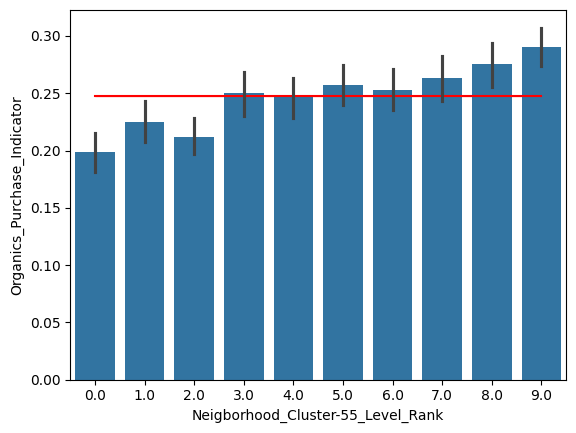

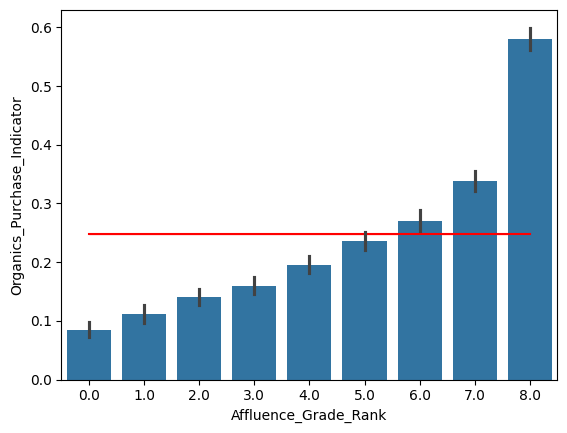

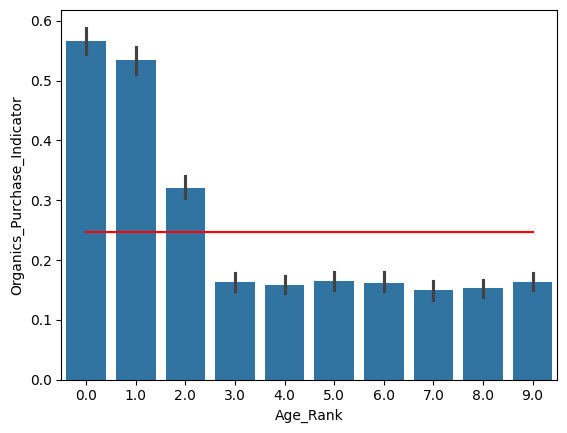

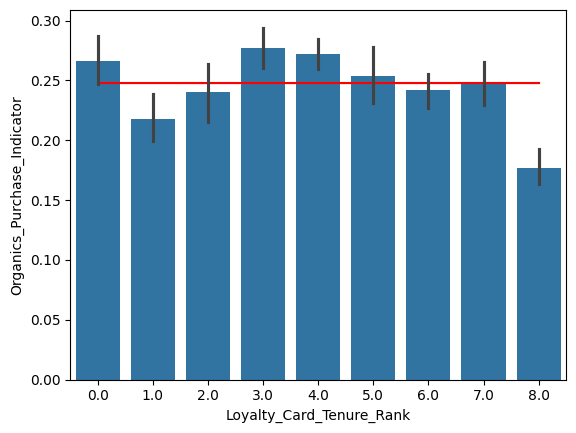

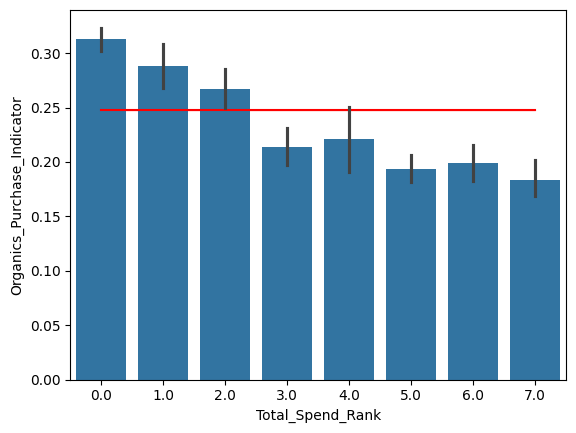

In [32]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Organics_Purchase_Indicator'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y='Organics_Purchase_Indicator',data=X_bin_combined, estimator=mean )
plt.show()

# Standardization

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for column in num.columns:
    num[num.columns] = sc.fit_transform(num[num.columns])

In [46]:
num.head()

,Neigborhood_Cluster-55_Level,Affluence_Grade,Age,Loyalty_Card_Tenure,Total_Spend
0,-0.786499,0.634017,1.499571,-0.676730,0.407454
1,0.550522,-1.490117,-0.498992,-0.389539,-0.005099
2,0.012124,-1.294684,1.310947,0.595116,-0.731120
3,1.456824,0.634017,0.984565,0.266898,-0.732921
4,-1.392196,0.954400,1.192263,0.595116,-0.732921


In [47]:
select_features_df_num=num

# Feature Selection - Categorical Features 

In [34]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))
char_unique_levels

,0
Gender,3
Geographic_Region,5
Loyalty_Status,4
Neighborhood_Cluster-7_Level,7
Television_Region,13


# Part 1 - Bi Variate Analysis

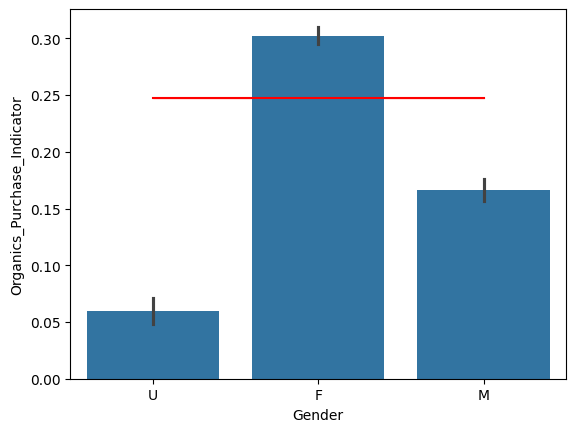

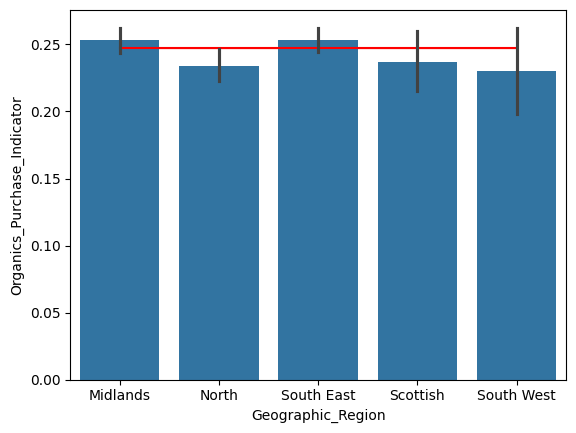

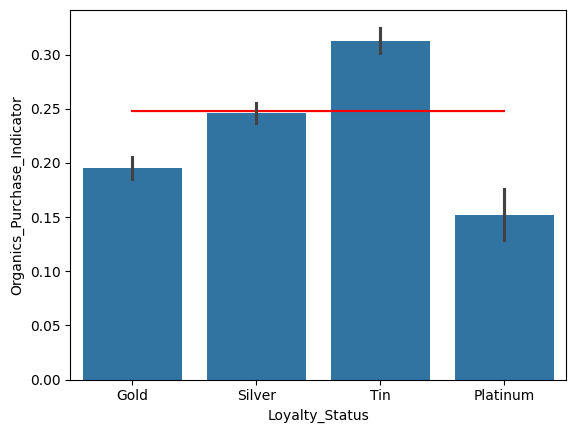

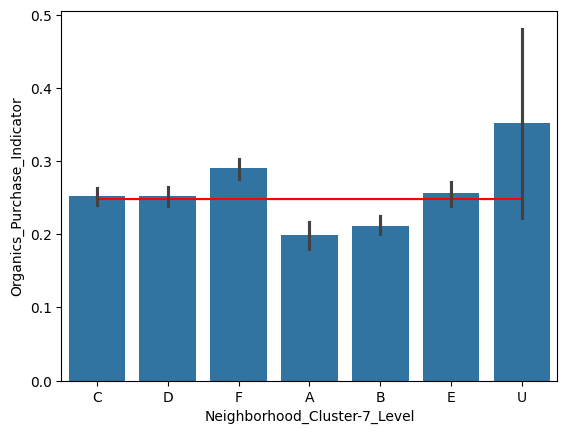

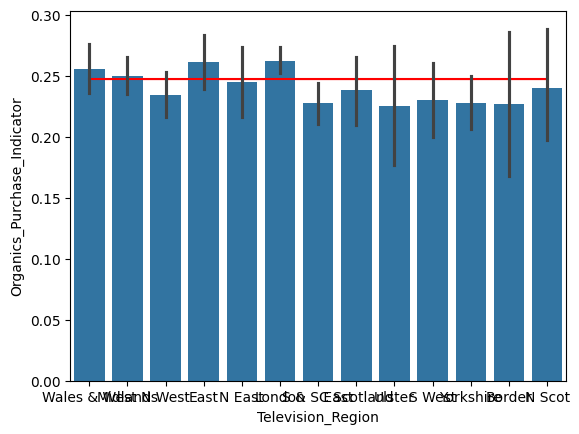

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Organics_Purchase_Indicator'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y='Organics_Purchase_Indicator',data=X_char_merged, estimator=mean )
plt.show()

In [36]:
char_droplist=['Geographic_Region','Television_Region']
char=char.drop(char_droplist,axis=1)

In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in char.columns:
    char[column] = label_encoder.fit_transform(char[column])

char.head()

,Gender,Loyalty_Status,Neighborhood_Cluster-7_Level
0,2,0,2
1,2,0,3
2,0,2,3
3,1,3,5
4,0,3,0


In [38]:
select_features_df_char = char

# Creating the Master Feature Set for Model Development

In [48]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [49]:
X_all.head()

,Gender,Loyalty_Status,Neighborhood_Cluster-7_Level,Neigborhood_Cluster-55_Level,Affluence_Grade,Age,Loyalty_Card_Tenure,Total_Spend
0,2,0,2,-0.786499,0.634017,1.499571,-0.676730,0.407454
1,2,0,3,0.550522,-1.490117,-0.498992,-0.389539,-0.005099
2,0,2,3,0.012124,-1.294684,1.310947,0.595116,-0.731120
3,1,3,5,1.456824,0.634017,0.984565,0.266898,-0.732921
4,0,3,0,-1.392196,0.954400,1.192263,0.595116,-0.732921


# Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [51]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (15556, 8)
Shape of Testing Data (6667, 8)
Response Rate in Training Data Organics_Purchase_Indicator    0.247686
dtype: float64
Response Rate in Testing Data Organics_Purchase_Indicator    0.247788
dtype: float64


# Building Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=42)

# Grid Search for Model Optimization

In [53]:
# Min_Samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [750, 1000, 1250, 1500] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 750}


In [54]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=750)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=750, random_state=0)

# Building Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=1000, random_state=0)

# Building Gradient Boosting Model

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='friedman_mse',random_state=0,max_depth=6,min_samples_split=150)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, min_samples_split=150, random_state=0)

# Model Evaluation

In [58]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [59]:
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [60]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))
print("Gini from the Decision Tree Model :",2*metrics.roc_auc_score(y_test,y_pred_tree)-1)

Accuracy from Decision Tree Model : 0.8014099295035249
Precision from Decision Tree Model : 0.6643286573146293
Recall from Decision Tree Model : 0.4013317191283293
f1_score from Decision Tree Model : 0.5003773584905661
Area under ROC Curve from Decision Tree Model : 0.6672660589659593
Gini from the Decision Tree Model : 0.3345321179319185


In [64]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))
print("Gini from the Random Forest Model :",2*metrics.roc_auc_score(y_test,y_pred_rf)-1)

Accuracy from Random Forest Model : 0.7937603119844008
Precision from Random Forest Model : 0.791578947368421
Recall from Random Forest Model : 0.22760290556900725
f1_score from Random Forest Model : 0.35354960037611655
Area under ROC Curve from Random Forest Model : 0.6039310639510042
Gini from the Random Forest Model : 0.2078621279020083


In [65]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_gbm))
print("Gini from the GBM Model :",2*metrics.roc_auc_score(y_test,y_pred_gbm)-1)

Accuracy from GBM Model : 0.807409629518524
Precision from GBM Model : 0.6735849056603773
Recall from GBM Model : 0.4322033898305085
f1_score from GBM Model : 0.5265486725663717
Area under ROC Curve from GBM Model : 0.6816051844466601
Gini from the GBM Model : 0.36321036889332015


# Extracting Feature Importance from the best model

In [67]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(8, 1)

# Extracting the Top 10 Important Model Features

In [68]:
feature_importances.iloc[0:10]

,importance
Age,0.465276
Affluence_Grade,0.338126
Gender,0.088179
Total_Spend,0.040849
Neigborhood_Cluster-55_Level,0.032923
Loyalty_Card_Tenure,0.026945
Neighborhood_Cluster-7_Level,0.005339
Loyalty_Status,0.002362


# Plotting the top 10 feature importances in a Horizontal Bar Plot

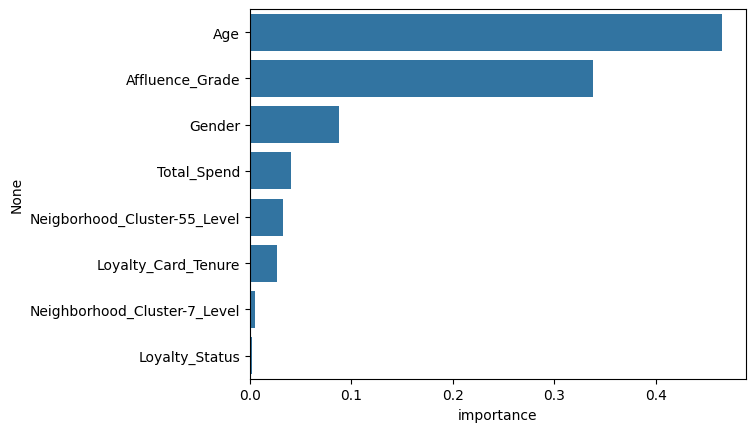

In [69]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

# Probability Decile Analysis and Gains Chart / Lorenz Curve

# Step 1 : Getting the Model Probabilities

In [70]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)

# Step 2 : Create Deciles based on the Model Probabilities

In [71]:
df['P_Rank_gbm']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
df[['pred_prob','P_Rank_gbm']].tail()

,pred_prob,P_Rank_gbm
22218,0.415660,9
22219,0.106895,4
22220,0.200496,6
22221,0.269651,7
22222,0.075347,3


# Step 3 : Summarize the data at Decile Level for Analysis

In [72]:
rank_df=df.groupby('P_Rank_gbm')['Organics_Purchase_Indicator'].agg(['count','mean']).sort_values(by='P_Rank_gbm',ascending=False)
rank_df.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df

,count,Actual_event_rate
P_Rank_gbm,,
10,2223,0.804768
9,2222,0.528803
8,2222,0.341584
7,2222,0.248875
6,2222,0.183168
5,2223,0.131354
4,2222,0.104860
3,2222,0.081458
2,2222,0.039604


# Step 4 - Event Capture Analysis across Probability Deciles

In [73]:
rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
rank_df['cum_events']=rank_df['N_events'].cumsum()
rank_df['event_cap']=rank_df['N_events']/max(rank_df['N_events'].cumsum())
rank_df['cum_event_cap']=rank_df['event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_gbm,,,,,,
10,2223,0.804768,1789.0,1789.0,0.324977,0.324977
9,2222,0.528803,1175.0,2964.0,0.213442,0.538420
8,2222,0.341584,759.0,3723.0,0.137875,0.676294
7,2222,0.248875,553.0,4276.0,0.100454,0.776748
6,2222,0.183168,407.0,4683.0,0.073933,0.850681
5,2223,0.131354,292.0,4975.0,0.053043,0.903724
4,2222,0.104860,233.0,5208.0,0.042325,0.946049
3,2222,0.081458,181.0,5389.0,0.032879,0.978928
2,2222,0.039604,88.0,5477.0,0.015985,0.994914


# Step 5 - Non Event Capture Analysis across Probability Deciles

In [75]:
rank_df['N_non_events']=rank_df['count']-rank_df['N_events']
rank_df['cum_non_events']=rank_df['N_non_events'].cumsum()
rank_df['non_event_cap']=rank_df['N_non_events']/max(rank_df['N_non_events'].cumsum())
rank_df['cum_non_event_cap']=rank_df['non_event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
P_Rank_gbm,,,,,,,,,,
10,2223,0.804768,1789.0,1789.0,0.324977,0.324977,434.0,434.0,0.025960,0.025960
9,2222,0.528803,1175.0,2964.0,0.213442,0.538420,1047.0,1481.0,0.062627,0.088587
8,2222,0.341584,759.0,3723.0,0.137875,0.676294,1463.0,2944.0,0.087510,0.176098
7,2222,0.248875,553.0,4276.0,0.100454,0.776748,1669.0,4613.0,0.099833,0.275930
6,2222,0.183168,407.0,4683.0,0.073933,0.850681,1815.0,6428.0,0.108566,0.384496
5,2223,0.131354,292.0,4975.0,0.053043,0.903724,1931.0,8359.0,0.115504,0.500000
4,2222,0.104860,233.0,5208.0,0.042325,0.946049,1989.0,10348.0,0.118974,0.618974
3,2222,0.081458,181.0,5389.0,0.032879,0.978928,2041.0,12389.0,0.122084,0.741058
2,2222,0.039604,88.0,5477.0,0.015985,0.994914,2134.0,14523.0,0.127647,0.868704


# Step 6 - Compute KS Statistic and Lift over Baseline Event Rate

In [76]:
rank_df['KS']=round((rank_df['cum_event_cap']-rank_df['cum_non_event_cap']),4)
rank_df['Baseline_Event_Rate']=(max(rank_df['cum_events'])/max(rank_df['count'].cumsum()))
rank_df['Lift_over_Avg']=rank_df['Actual_event_rate']/rank_df['Baseline_Event_Rate']
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg
P_Rank_gbm,,,,,,,,,,,,,
10,2223,0.804768,1789.0,1789.0,0.324977,0.324977,434.0,434.0,0.025960,0.025960,0.2990,0.247716,3.248750
9,2222,0.528803,1175.0,2964.0,0.213442,0.538420,1047.0,1481.0,0.062627,0.088587,0.4498,0.247716,2.134711
8,2222,0.341584,759.0,3723.0,0.137875,0.676294,1463.0,2944.0,0.087510,0.176098,0.5002,0.247716,1.378933
7,2222,0.248875,553.0,4276.0,0.100454,0.776748,1669.0,4613.0,0.099833,0.275930,0.5008,0.247716,1.004677
6,2222,0.183168,407.0,4683.0,0.073933,0.850681,1815.0,6428.0,0.108566,0.384496,0.4662,0.247716,0.739428
5,2223,0.131354,292.0,4975.0,0.053043,0.903724,1931.0,8359.0,0.115504,0.500000,0.4037,0.247716,0.530260
4,2222,0.104860,233.0,5208.0,0.042325,0.946049,1989.0,10348.0,0.118974,0.618974,0.3271,0.247716,0.423309
3,2222,0.081458,181.0,5389.0,0.032879,0.978928,2041.0,12389.0,0.122084,0.741058,0.2379,0.247716,0.328836
2,2222,0.039604,88.0,5477.0,0.015985,0.994914,2134.0,14523.0,0.127647,0.868704,0.1262,0.247716,0.159876


# Step 7 - Create Deciles (1-10) column to indicate the Decile number

In [77]:
rank_df=rank_df.reset_index()
rank_df['Decile']=rank_df.index+1
rank_df

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg,Decile
0,10,2223,0.804768,1789.0,1789.0,0.324977,0.324977,434.0,434.0,0.025960,0.025960,0.2990,0.247716,3.248750,1
1,9,2222,0.528803,1175.0,2964.0,0.213442,0.538420,1047.0,1481.0,0.062627,0.088587,0.4498,0.247716,2.134711,2
2,8,2222,0.341584,759.0,3723.0,0.137875,0.676294,1463.0,2944.0,0.087510,0.176098,0.5002,0.247716,1.378933,3
3,7,2222,0.248875,553.0,4276.0,0.100454,0.776748,1669.0,4613.0,0.099833,0.275930,0.5008,0.247716,1.004677,4
4,6,2222,0.183168,407.0,4683.0,0.073933,0.850681,1815.0,6428.0,0.108566,0.384496,0.4662,0.247716,0.739428,5
5,5,2223,0.131354,292.0,4975.0,0.053043,0.903724,1931.0,8359.0,0.115504,0.500000,0.4037,0.247716,0.530260,6
6,4,2222,0.104860,233.0,5208.0,0.042325,0.946049,1989.0,10348.0,0.118974,0.618974,0.3271,0.247716,0.423309,7
7,3,2222,0.081458,181.0,5389.0,0.032879,0.978928,2041.0,12389.0,0.122084,0.741058,0.2379,0.247716,0.328836,8
8,2,2222,0.039604,88.0,5477.0,0.015985,0.994914,2134.0,14523.0,0.127647,0.868704,0.1262,0.247716,0.159876,9
9,1,2223,0.012596,28.0,5505.0,0.005086,1.000000,2195.0,16718.0,0.131296,1.000000,0.0000,0.247716,0.050847,10


# Visualizing the performance of Model Probabilties across Deciles

# Step 8 - Create the Rank Ordering Chart

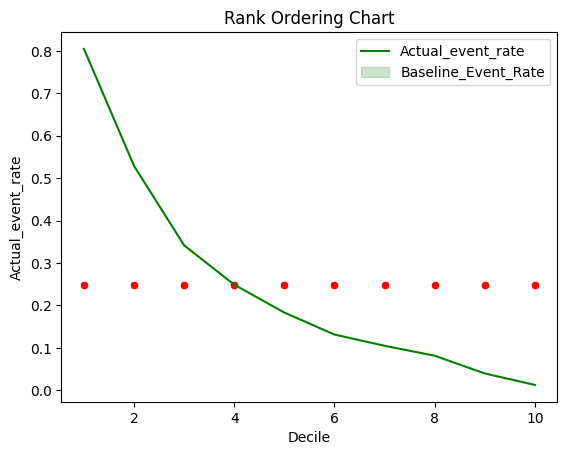

In [78]:
ax = sns.lineplot(x="Decile", y="Actual_event_rate", data=rank_df,color='green').set_title('Rank Ordering Chart')
ax = sns.scatterplot( x="Decile", y="Baseline_Event_Rate", data=rank_df,color='red')
ax.legend(['Actual_event_rate', 'Baseline_Event_Rate'])

# Step 9 - Create the Lift Chart

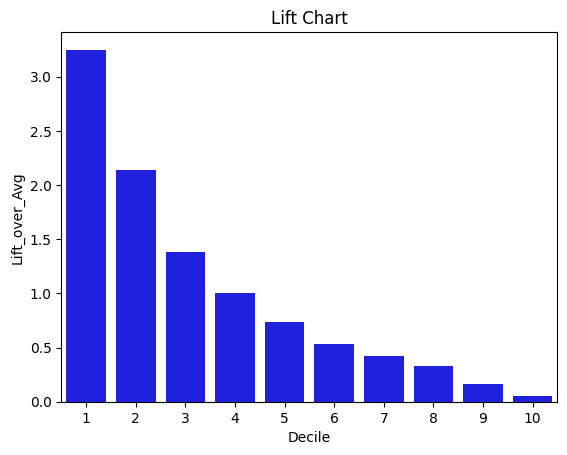

In [79]:
ax = sns.barplot( x="Decile", y="Lift_over_Avg", data=rank_df,color='blue').set_title('Lift Chart')

# Step 10 - Create the Gains Chart / Lorenz Curve

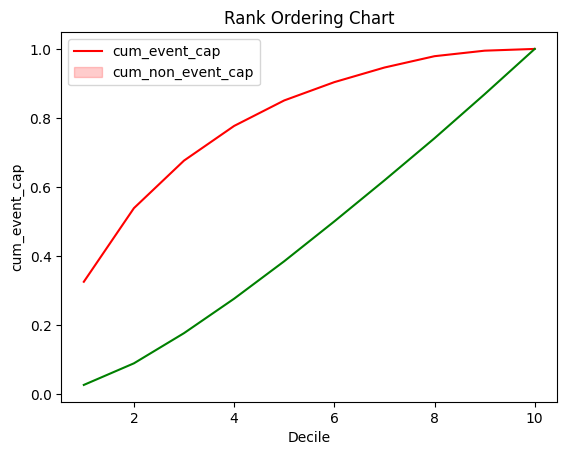

In [80]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=rank_df,color='red').set_title('Rank Ordering Chart')
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=rank_df,color='green')
ax.legend(['cum_event_cap', 'cum_non_event_cap'])

# Is our Model able to Maximise Event/Non-Event Discrimination by the Top 3 deciles?

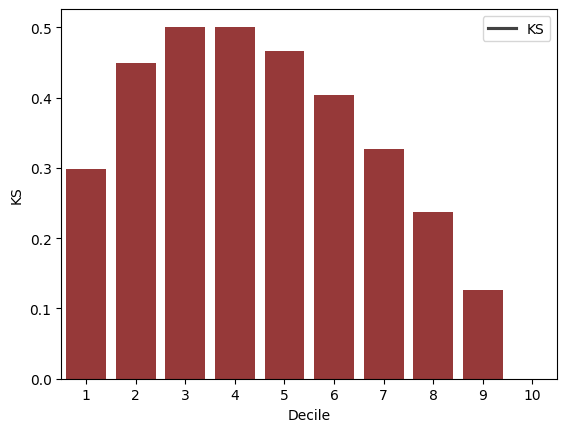

In [81]:
ax = sns.barplot( x="Decile", y="KS", data=rank_df,color='brown')
ax.legend(['KS'])

# Utlize APT framework to build a Machine Learning Driven Strategy

# A - Audience (Who do we target?)

In [82]:
df['Predicted_Resp_Rank']=np.where(df['P_Rank_gbm']<8,"Bottom7","Top3")
df['Predicted_Resp_Rank'].value_counts()

Predicted_Resp_Rank
Bottom7    15556
Top3        6667
Name: count, dtype: int64

In [83]:
df_top3=df.loc[df['Predicted_Resp_Rank']=="Top3",:]
df_top3.shape

(6667, 14)

# P - Prioritization (Based on Business Value and Customer Engagement)

In [84]:
df_top3['spend_level']=np.where(df_top3['Total_Spend']<=df_top3['Total_Spend'].quantile(0.80),"Low Spend","High Spend")
df_top3['spend_level'].value_counts()

spend_level
Low Spend     5582
High Spend    1085
Name: count, dtype: int64

In [85]:
df_top3['Affluence_level']=np.where(df_top3['Affluence_Grade']>=13,"High Affluence","Low Affluence")
df_top3['Affluence_level'].value_counts()

Affluence_level
Low Affluence     4446
High Affluence    2221
Name: count, dtype: int64

In [86]:
pd.crosstab(index=df_top3['spend_level'], columns=df_top3['Affluence_level'],values=df_top3['pred_prob'],aggfunc='mean')

Affluence_level,High Affluence,Low Affluence
spend_level,,
High Spend,0.554552,0.459187
Low Spend,0.655429,0.497102


In [87]:
pd.crosstab(index=df_top3['spend_level'], columns=df_top3['Affluence_level'],values=df_top3['pred_prob'],aggfunc='count')

Affluence_level,High Affluence,Low Affluence
spend_level,,
High Spend,449,636
Low Spend,1772,3810


In [88]:
df_priority_1=df_top3.loc[(df_top3['spend_level']=='Low Spend') & (df_top3['Affluence_level']=='High Affluence'),:]
df_priority_1.shape

(1772, 16)

In [89]:
df_priority_2=df_top3.loc[(df_top3['spend_level']=='High Spend') & (df_top3['Affluence_level']=='High Affluence'),:]
df_priority_2.shape

(449, 16)

In [90]:
df_priority_3=df_top3.loc[(df_top3['spend_level']=='Low Spend') & (df_top3['Affluence_level']=='Low Affluence'),:]
df_priority_3.shape

(3810, 16)

In [91]:
df_priority_4=df_top3.loc[(df_top3['spend_level']=='High Spend') & (df_top3['Affluence_level']=='Low Affluence'),:]
df_priority_4.shape

(636, 16)

# Project Report and Actionable Insights

# Objective of the Project
Predict Loyalty towards Organic Products  for enabling Supermarket to design the next Marketing Campaign

# Baseline Event Rate
The Response Rate from the data is 25%

# Algorithms Used :
In this project we have used Decision Trees, Random Forests and Gradient Boosting Algorithms

# Final Model Algorithm

Among the models that we tried building the GBM Algorithm performed the best in terms of F1_Score, Area under ROC Curve and Overall Model Gini

Therefore we have kept GBM as the final model algorithm

# Grid Search CV parameters
Maximum Depth of Tree - 5

Minimum Sample Size for Nodes to be Split - 1000 Observations

# Model Performance Measures

Accuracy - 0.80

Precision - 0.64

Recall - 0.42

F1 Score - 0.51

AUC - 0.67

Gini - 0.34          

# Model Probability Discrimination Measures
Steady Event Rate Rank Ordering (Yes/No) - Yes

Rank Ordering Reverals in Top 3 Deciles (Yes/No) - No

lift over  baseline event rate in the Top Decile - 3.14

Cumulative Event Capture in the Top 3 Deciles - 67%

Maximum KS Statistic Value - 0.49

Does KS Statistic Maximize within Top 3 Deciles (Yes/No) - Yes


# Top 10 drivers from the Model

Age

High_Affluence_Ind

Total_Spend

Gender_U

Neigborhood_Cluster-55_Level

Gender_M

Loyalty_Card_Tenure

Neighborhood_Cluster-7_Level_B

Neighborhood_Cluster-7_Level_E

Neighborhood_Cluster-7_Level_U


# Deploying the APT Strategy 
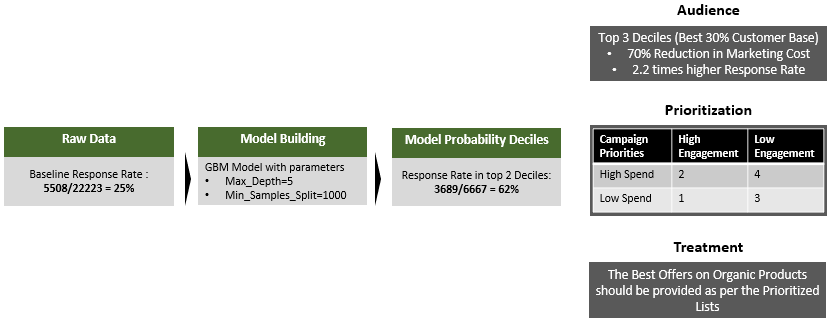
